# Paper Analysis Consolidation

## 1. Setup and Common Initializations

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

import paper_analysis_utils as pau

# --- Configuration ---

SNS_METADATA_PATH = "/home/ltausani/Documents/GitHub/ZXDREAM/metaexperiment/SnS_multiexp_dirs.json" # Used by multiple analyses
DIST_PARAMS_PATH = '/home/ltausani/Documents/GitHub/ZXDREAM/paper_analysis/distance_params.json' # For Distance Analysis
MULTINET_ACCURACY_SEARCH_PATTERN = os.path.join('../metaexperiment/Distance_analysis', "SnS_nats_*_115", "accuracy.json") # For MultiNet Analysis
MULTINET_DIST_PARAMS_SOURCE = '/home/ltausani/Documents/GitHub/ZXDREAM/paper_analysis/multinet_params.json' # A sample dist_params for plotting styles, relative to where multiNets.ipynb was
HUMAN_DATA_PATH = '/home/ltausani/Documents/GitHub/ZXDREAM/stretch_squeeze_psych_share/means_by_group.csv' # For MultiNet Correlation

BASE_OUTPUT_DIR = "./paper_analysis_outputs"
os.makedirs(BASE_OUTPUT_DIR, exist_ok=True)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# --- Common Data Loading ---
try:
    experiments_metadata = pau.SnS_metadata.from_json(SNS_METADATA_PATH, recalculate=False)
    print(f"Successfully loaded SnS_metadata from {SNS_METADATA_PATH}")
except Exception as e:
    print(f"Error loading SnS_metadata: {e}. Some analyses might fail.")
    experiments_metadata = None

try:
    prms_dist = pau.read_json(DIST_PARAMS_PATH)
    print(f"Successfully loaded distance parameters from {DIST_PARAMS_PATH}")
except Exception as e:
    print(f"Error loading distance parameters: {e}. Distance analysis might fail.")
    prms_dist = None

# Initialize a general-purpose generator (e.g., fc7, common in playgrounds)
try:
    # Using WEIGHTS from pau, which might be a placeholder if experiment.utils.args is not found
    generator_fc7 = pau.DeePSiMGenerator(root=str(pau.WEIGHTS), variant='fc7').to(DEVICE)
    print("Initialized DeePSiMGenerator (fc7 variant).")
except Exception as e:
    print(f"Error initializing DeePSiMGenerator (fc7): {e}")
    generator_fc7 = None

# Initialize a reference TorchNetworkSubject for SVC (standard resnet50, '00_input_01')
rec_ly_svc = '00_input_01'
try:
    probe_svc = pau.RecordingProbe(target={rec_ly_svc: []})
    # Using torch_load from pau (pxdream.utils.torch_net_load_functs)
    repr_net_svc_resnet50_vanilla = pau.TorchNetworkSubject(
        record_probe=probe_svc, 
        network_name='resnet50', 
        t_net_loading=pau.torch_load, 
        custom_weights_path=''
    ).eval().to(DEVICE)
    print("Initialized TorchNetworkSubject for SVC (ResNet50 vanilla, '00_input_01').")
except Exception as e:
    print(f"Error initializing TorchNetworkSubject for SVC: {e}")
    repr_net_svc_resnet50_vanilla = None

/opt/miniconda3/.conda/envs/zdream/lib/python3.11/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/opt/miniconda3/.conda/envs/zdream/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/opt/miniconda3/.conda/envs/zdream/lib/python3.11/site-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


Using device: cuda


Neural Network Types:   0%|          | 0/1 [00:00<?, ?it/s]




































































































































































































































































































































































































































































































































































































































































































































































































































































Neural Network Types: 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]


Successfully loaded SnS_metadata from /home/ltausani/Documents/GitHub/ZXDREAM/metaexperiment/SnS_multiexp_dirs.json
Successfully loaded distance parameters from /home/ltausani/Documents/GitHub/ZXDREAM/paper_analysis/distance_params.json
Initialized DeePSiMGenerator (fc7 variant).
['__class__', '__doc__', '__eq__', '__hash__', '__module__', 'get_state_dict', 'meta', 'name', 'transforms', 'url', 'value', 'verify']
Initialized TorchNetworkSubject for SVC (ResNet50 vanilla, '00_input_01').


## 2. Centroid Plot + Activation Percentiles Boxplot 

In [ ]:
from src.snslib.metaexperiment.metaexp_functs import nat_percentiles
import importlib
import src.snslib.metaexperiment.plots
importlib.reload(src.snslib.metaexperiment.plots)
from src.snslib.metaexperiment.plots import SnS_scatterplot

experiments_metadata.apply_analysis(queries=[['resnet50', '56_linear_01','robust_l2', '00_input_01', '500', 'invariance 2.0'],['resnet50', '56_linear_01','robust_l2', '00_input_01', '500', 'adversarial 1.0']],
    callables=[nat_percentiles, SnS_scatterplot])

In [ ]:
if experiments_metadata:
    # Define experiment queries 
    exp_std_inv_pix = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','vanilla', '00_input_01', '500', 'invariance 2.0']])
    exp_std_inv_25  = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','vanilla', '26_conv_25', '500', 'invariance 2.0']])
    exp_std_inv_51  = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','vanilla', '52_conv_51', '500', 'invariance 2.0']])
    exp_std_adv_pix = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','vanilla', '00_input_01', '500', 'adversarial 1.0']])

    exp_r_inv_pix  = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','robust_l2', '00_input_01', '500', 'invariance 2.0']])
    exp_r_inv_25    = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','robust_l2', '26_conv_25', '500', 'invariance 2.0']])
    exp_r_inv_51    = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','robust_l2', '52_conv_51', '500', 'invariance 2.0']])
    exp_r_adv_pix   = experiments_metadata.get_experiments(queries=[['resnet50', '56_linear_01','robust_l2', '00_input_01', '500', 'adversarial 1.0']])

    # Calculate activation percentiles 
    print("Calculating activation percentiles...")
    nat_stats_std_inv_pix = pau.calculate_activation_percentiles(exps=exp_std_inv_pix)
    nat_stats_r_inv_pix   = pau.calculate_activation_percentiles(exps=exp_r_inv_pix)
    nat_stats_std_inv_25  = pau.calculate_activation_percentiles(exps=exp_std_inv_25)
    nat_stats_r_inv_25    = pau.calculate_activation_percentiles(exps=exp_r_inv_25)
    nat_stats_std_inv_51  = pau.calculate_activation_percentiles(exps=exp_std_inv_51)
    nat_stats_r_inv_51    = pau.calculate_activation_percentiles(exps=exp_r_inv_51)
    nat_stats_adv_std     = pau.calculate_activation_percentiles(exps=exp_std_adv_pix)
    nat_stats_adv_rob     = pau.calculate_activation_percentiles(exps=exp_r_adv_pix)
    

    # Generate the boxplot
    print("\nGenerating Plot 1 (Standard Invariance and Adversarial)...")
    sns_experiments_plot1 = [
        # Order matters for visual grouping 
        ("Adv Pixel space", nat_stats_adv_std, nat_stats_adv_rob),
        ("Inv Pixel space", nat_stats_std_inv_pix, nat_stats_r_inv_pix),
        ("Inv Layer3_conv1", nat_stats_std_inv_25, nat_stats_r_inv_25),
        ("Inv Layer4_conv7", nat_stats_std_inv_51, nat_stats_r_inv_51)
    ]
    
    pau.plot_activation_percentiles_boxplot(
        general_stats_std=nat_stats_std_inv_pix, # For 'Same cat.', 'Other cats.'
        general_stats_rob=nat_stats_r_inv_pix,
        sns_experiment_data=sns_experiments_plot1,
        save_dir=os.path.join(BASE_OUTPUT_DIR, "activation_boxplot_outputs"),
        filename="activation_percentiles_plot1_inv_adv.png"
    )
else:
    print("SnS_metadata not loaded. Skipping Activation Percentiles Boxplot.")

In [4]:
percent_convergence_niter={}
median_nat_perc = {}
for exp in [exp_std_inv_pix,exp_std_inv_25,exp_std_inv_51,exp_std_adv_pix,exp_r_inv_pix,exp_r_inv_25,exp_r_inv_51,exp_r_adv_pix]:
    exp_name= list(exp.keys())[0]
    exp_df = exp[exp_name]['df']
    percent_convergence_niter[exp_name] = (exp_df['nat_stat_early_stopping_p1_n_it'].isna().sum()/exp_df['nat_stat_early_stopping_p1_n_it'].shape[-1])
    median_nat_perc[exp_name] = exp_df['nat_percentiles'].median()
    


In [ ]:
median_nat_perc

### Convergence rate for target units in readout layer

In [ ]:
percent_convergence_niter

### Convergence rate for target units in mid and high levels of the network

Saved activation percentile boxplot to ./paper_analysis_outputs/activation_boxplot_outputs/activation_percentiles_plot2_mid_high.png


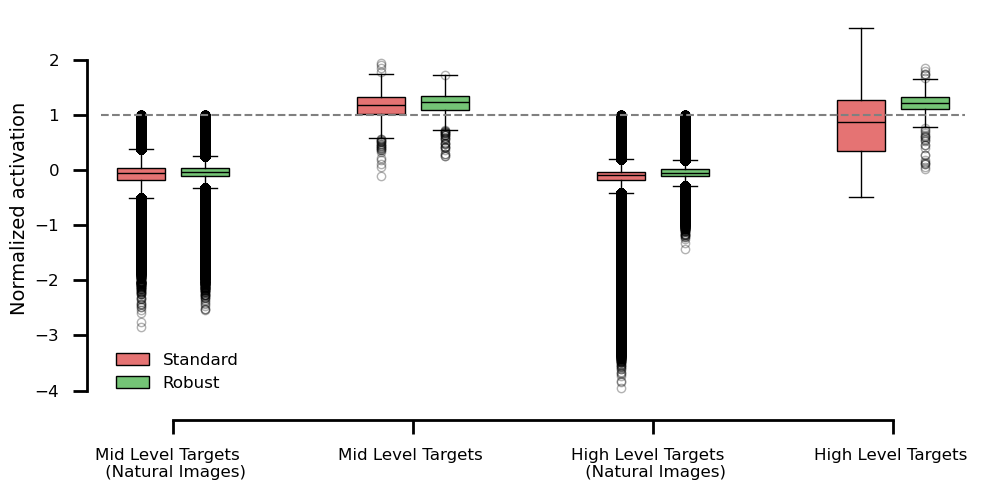

In [2]:
exp_std_mid_trg25 = experiments_metadata.get_experiments(queries=[['resnet50', '26_conv_25','vanilla', '00_input_01', '500', 'invariance 2.0']])
exp_std_high_trg51 = experiments_metadata.get_experiments(queries=[['resnet50', '52_conv_51','vanilla', '00_input_01', '500', 'invariance 2.0']])


exp_r_mid_trg25 = experiments_metadata.get_experiments(queries=[['resnet50', '26_conv_25','robust_l2', '00_input_01', '500', 'invariance 2.0']])
exp_r_high_trg51 = experiments_metadata.get_experiments(queries=[['resnet50', '52_conv_51','robust_l2', '00_input_01', '500', 'invariance 2.0']])


percent_convergence_niter_diffTRG={}
median_nat_perc_diffTRG = {}
for exp in [exp_std_mid_trg25,exp_std_high_trg51,exp_r_mid_trg25,exp_r_high_trg51]:
    exp_name= list(exp.keys())[0]
    exp_df = exp[exp_name]['df']
    percent_convergence_niter_diffTRG[exp_name] = 1-(exp_df['nat_stat_early_stopping_p1_n_it'].isna().sum()/exp_df['nat_stat_early_stopping_p1_n_it'].shape[-1])
    
nat_stats_std_mid_trg25 = pau.calculate_activation_percentiles(exps=exp_std_mid_trg25)
nat_stats_r_mid_trg25   = pau.calculate_activation_percentiles(exps=exp_r_mid_trg25)
nat_stats_std_high_trg51  = pau.calculate_activation_percentiles(exps=exp_std_high_trg51)
nat_stats_r_high_trg51    = pau.calculate_activation_percentiles(exps=exp_r_high_trg51)

if 'nat_stats_std_mid_trg25' in locals() and 'nat_stats_std_high_trg51' in locals():
    sns_experiments_plot2 = [
        ("Mid Level Targets ", nat_stats_std_mid_trg25, nat_stats_r_mid_trg25),
        ("High Level Targets ", nat_stats_std_high_trg51, nat_stats_r_high_trg51)
        
    ]

   
    pau.plot_activation_percentiles_boxplot(
        general_stats_std=nat_stats_std_mid_trg25, 
        general_stats_rob=nat_stats_r_mid_trg25,
        sns_experiment_data=sns_experiments_plot2,
        save_dir=os.path.join(BASE_OUTPUT_DIR, "activation_boxplot_outputs"),
        filename="activation_percentiles_plot2_mid_high.png"
    )
else:
    print("Data for Plot 2 (Mid/High Target) not available. Skipping.")



In [ ]:
percent_convergence_niter_diffTRG

## 3. SVC Analysis 

In [ ]:
if experiments_metadata and generator_fc7 and repr_net_svc_resnet50_vanilla:
    print("Starting SVC Analysis...")
    # Get experiment data for 'vanilla' and 'robust_l2'
    queries_vanilla_svc = [
        ['resnet50', '56_linear_01','vanilla', '00_input_01', '500', 'invariance 2.0'],
        ['resnet50', '56_linear_01','vanilla', '26_conv_25', '500', 'invariance 2.0'],
        ['resnet50', '56_linear_01','vanilla', '52_conv_51', '500', 'invariance 2.0']
    ]
    exp_vanilla_svc = experiments_metadata.get_experiments(queries=queries_vanilla_svc)

    queries_robust_l2_svc = [
        ['resnet50', '56_linear_01','robust_l2', '00_input_01', '500', 'invariance 2.0'],
        ['resnet50', '56_linear_01','robust_l2', '26_conv_25', '500', 'invariance 2.0'],
        ['resnet50', '56_linear_01','robust_l2', '52_conv_51', '500', 'invariance 2.0']
    ]
    exp_robust_l2_svc = experiments_metadata.get_experiments(queries=queries_robust_l2_svc)
    
    # Process data for 'vanilla' SVC
    print("\nProcessing 'vanilla' experiments for SVC...")
    reprs_vanilla = pau.process_experiment_data_for_svc(
        exp_vanilla_svc, p1='end_p1_idxs', rec_ly=rec_ly_svc, 
        generator=generator_fc7, repr_net=repr_net_svc_resnet50_vanilla, DEVICE=DEVICE
    )
    final_result_vanilla = pau.unify_representations(reprs_vanilla)
    
    npcs_values_svc = [2, 10, 25, 50, 100]
    van_results_svc = []
    if final_result_vanilla and rec_ly_svc in final_result_vanilla[0] and final_result_vanilla[0][rec_ly_svc].size > 0:
        van_results_svc = pau.calculate_classwise_scores_svc(
            final_result_vanilla[0][rec_ly_svc], 
            np.array(final_result_vanilla[1]), 
            npcs_values_svc
        )
        print("Completed 'vanilla' SVC processing.")
    else:
        print("Warning: No data for 'vanilla' SVC after processing. Skipping score calculation.")

    # Process data for 'robust_l2' SVC
    print("\nProcessing 'robust_l2' experiments for SVC...")
    reprs_robust = pau.process_experiment_data_for_svc(
        exp_robust_l2_svc, p1='end_p1_idxs', rec_ly=rec_ly_svc, 
        generator=generator_fc7, repr_net=repr_net_svc_resnet50_vanilla, DEVICE=DEVICE # Using same standard ResNet50 for representation
    )
    final_result_robust = pau.unify_representations(reprs_robust)
    
    rob_results_svc = []
    if final_result_robust and rec_ly_svc in final_result_robust[0] and final_result_robust[0][rec_ly_svc].size > 0:
        rob_results_svc = pau.calculate_classwise_scores_svc(
            final_result_robust[0][rec_ly_svc], 
            np.array(final_result_robust[1]), 
            npcs_values_svc
        )
        print("Completed 'robust_l2' SVC processing.")
    else:
        print("Warning: No data for 'robust_l2' SVC after processing. Skipping score calculation.")

    # Plot SVC results
    if van_results_svc or rob_results_svc: # Check if there are any results to plot
        print("\nPlotting SVC results...")
        display_names_map_svc = {
            '00_input_01': 'Pixel Space',
            '26_conv_25':  'Layer3_conv1',
            '52_conv_51':  'Layer4_conv7'
        }
        # Use keys from one of the experiment dicts for layer labels in the plot legend
        # The specific choice (vanilla or robust) for keys mainly affects label generation if formats differ.
        # Assuming consistent formatting, either should work. Original used the last one (robust).
        exp_keys_for_plot = list(exp_robust_l2_svc.keys()) if exp_robust_l2_svc else list(exp_vanilla_svc.keys())
        
        pau.plot_svc_accuracy(
            van_results_svc, rob_results_svc, 
            exp_keys_source=exp_keys_for_plot, 
            display_names_map=display_names_map_svc, 
            save_dir=os.path.join(BASE_OUTPUT_DIR, "svc_analysis_outputs")
        )
    else:
        print("No results to plot for SVC analysis.")
else:
    print("SnS_metadata, generator, or SVC reference network not loaded. Skipping SVC Analysis.")

## 4. Distance Analysis 

Starting Distance Analysis...
['__class__', '__doc__', '__eq__', '__hash__', '__module__', 'get_state_dict', 'meta', 'name', 'transforms', 'url', 'value', 'verify']
['__class__', '__doc__', '__eq__', '__hash__', '__module__', 'get_state_dict', 'meta', 'name', 'transforms', 'url', 'value', 'verify']


Neural Network Types:   0%|          | 0/1 [00:00<?, ?it/s]




































































































































































































































































































































































































































































































































































































































































































































































































Neural Network Types: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
/home/ltausani/Documents/GitHub/ZXDREAM/metaexperiment/distance_analysis.py:516: FutureWarning: Data

mXDREAM - vanilla
mXDREAM - l2robust
Distance analysis found for nat_images - random
Distance analysis found for nat_images - same cat


/home/ltausani/Documents/GitHub/ZXDREAM/pxdream/utils/misc.py:510: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f_aggr_single_cell(x))


dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(['High Level', 'MEI'])
2
torch.Size([3, 256, 256]) 11 torch.Size([3, 256, 256])
dict_keys(

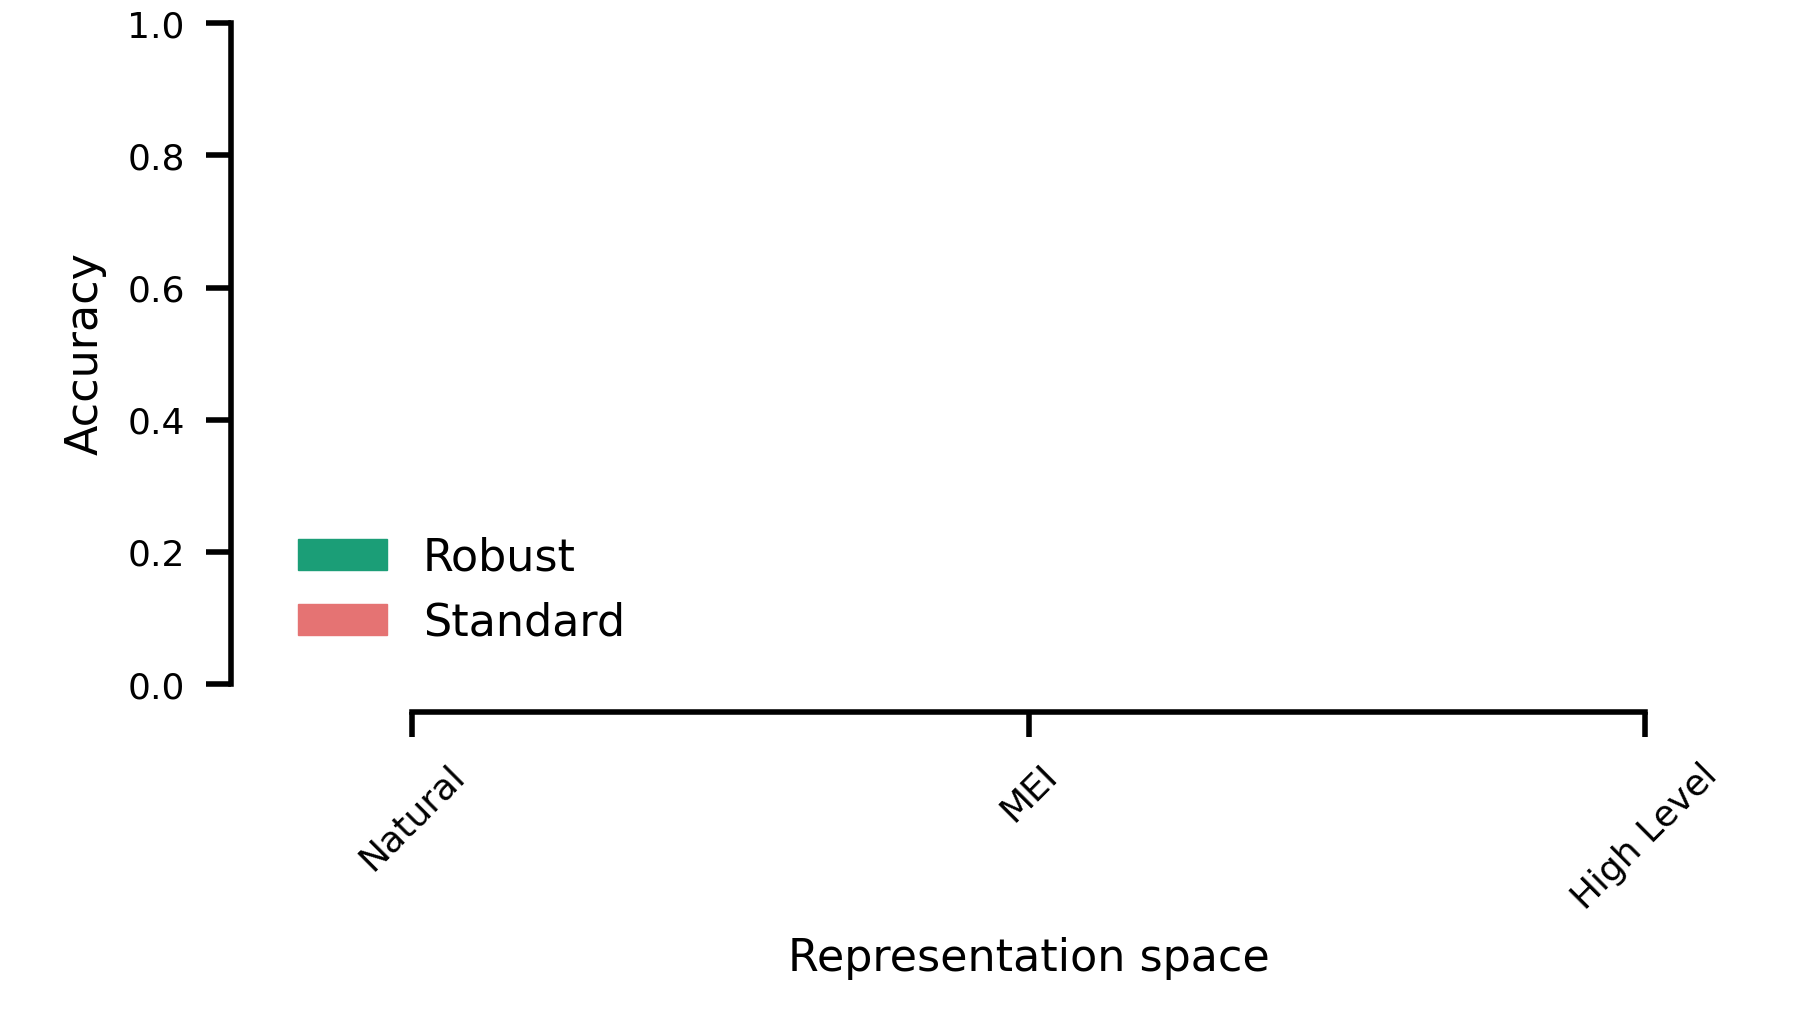

In [2]:
if prms_dist and SNS_METADATA_PATH: # Ensure prms_dist is loaded
    print("Starting Distance Analysis...")
    da_results = pau.run_full_distance_analysis(
        prms_dist,
        SNS_METADATA_PATH, # Pass path, SnS_metadata will be loaded inside run_full_distance_analysis
        DEVICE,
        BASE_OUTPUT_DIR
    )
    print("\nDistance Analysis complete.")
    print(f"Results saved in: {da_results['analysis_dir']}")


## 5. Multi-Network Accuracy Analysis

In [ ]:
print("Starting Multi-Network Accuracy Analysis...")
mn_df, mn_df_orig, mn_color_map, mn_ordered_labels = pau.load_and_process_multinet_accuracies(
    search_pattern=MULTINET_ACCURACY_SEARCH_PATTERN,
    dist_params_plotting_source_path=MULTINET_DIST_PARAMS_SOURCE
)

if not mn_df.empty:
    print("\nPlotting multi-network accuracy trends...")
    pau.plot_multinet_accuracy_trends(
        mn_df, mn_ordered_labels, mn_color_map,
        save_dir=os.path.join(BASE_OUTPUT_DIR, "multinet_analysis_outputs")
    )

    print("\nPerforming correlation analysis with human data...")
    mn_correlations, mn_p_values = pau.perform_correlation_analysis_with_human(
        human_data_path=HUMAN_DATA_PATH,
        model_df_orig=mn_df_orig,
        color_map=mn_color_map,
        save_dir=os.path.join(BASE_OUTPUT_DIR, "multinet_analysis_outputs")
    )
    if mn_correlations:
        print("\nTop 3 Model Correlations with Human Data:")
        for i, (model, r_val) in enumerate(mn_correlations.items()):
            if i < 3:
                print(f"  {model}: r = {r_val:.3f}, p = {mn_p_values[model]:.3g}")
            else:
                break
else:
    print("No data loaded for multi-network analysis. Skipping plots and correlations.")
